# What is Natural Language processing?

Computers are great at working with structured data like spreadsheets and database tables. But us humans usually communicate in words, not in tables. That’s unfortunate for computers.

A lot of information in the world is unstructured — raw text in English or another human language. How can we get a computer to understand unstructured text and extract data from it?


**Natural Language Processing, or NLP,** is the sub-field of AI that is focused on enabling computers to understand and process human languages.

Great [article](https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e) on Medium about NLP! **MUST READ!**

Good [post](https://habr.com/ru/company/Voximplant/blog/446738/) on HABR about basics of NLP.

[Introductory overview of NLP](https://tfduque.medium.com/dissecting-natural-language-processing-layer-by-layer-an-introductory-overview-d11cfff4f329)

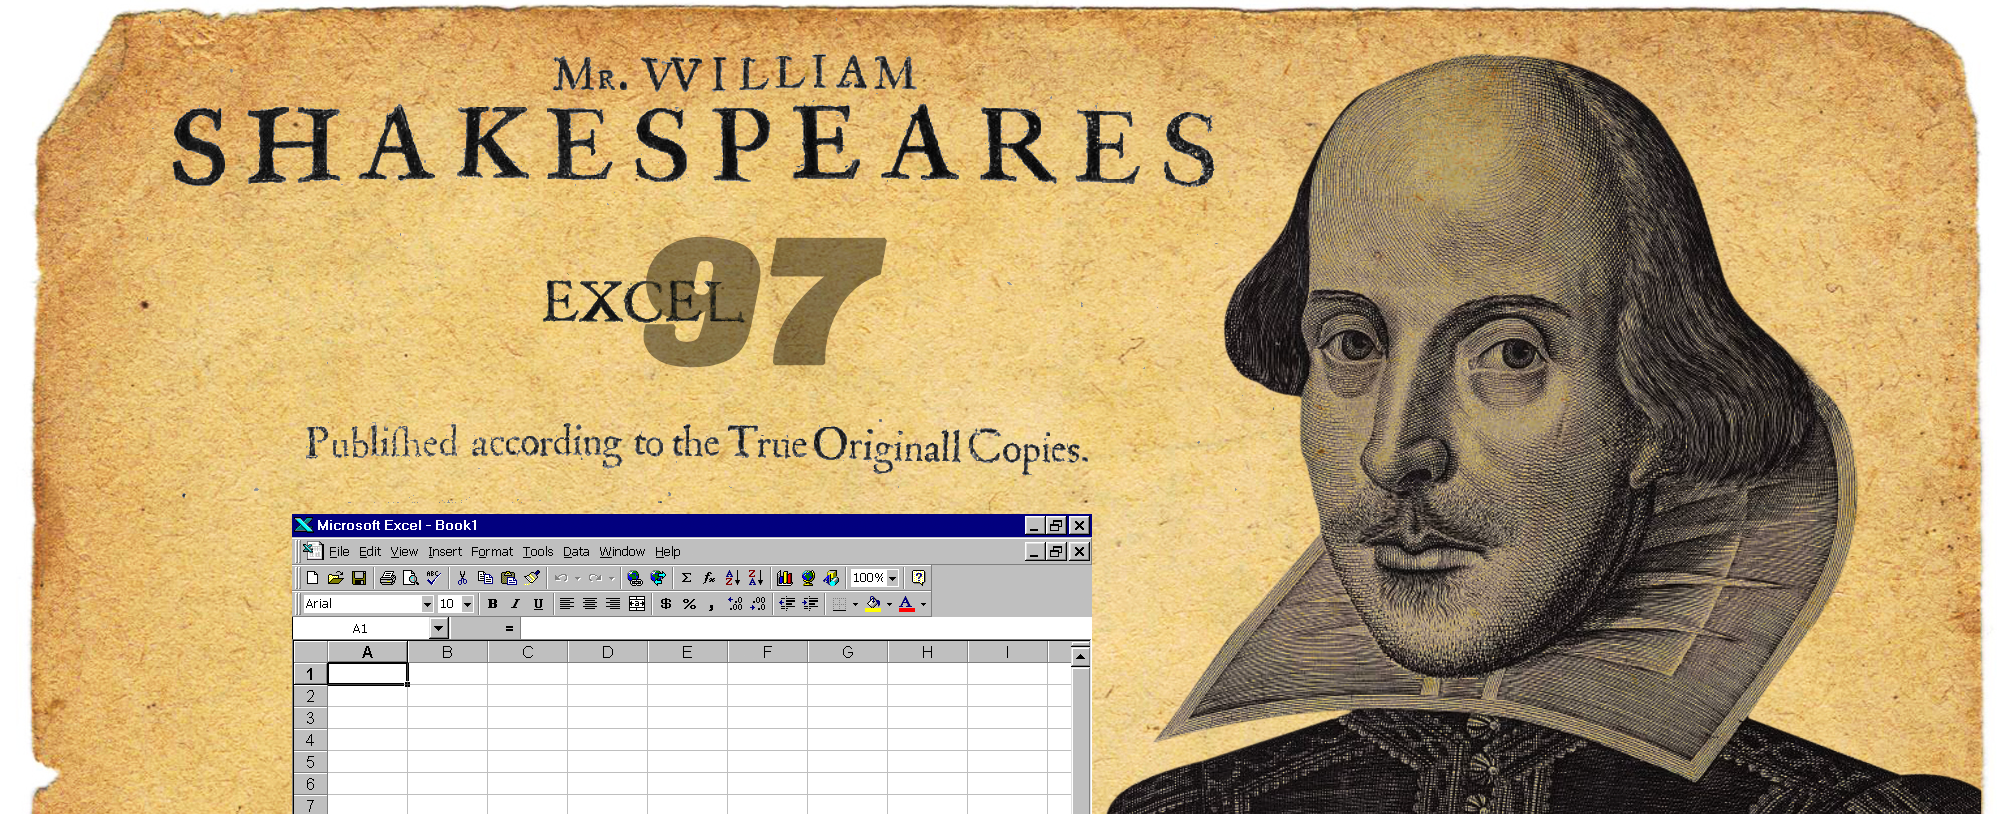

Picture is taken from [this site](https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e).

In [ ]:
%matplotlib inline
! pip install pymorphy2 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 8.2 MB 16.3 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=9807eb5bd70014dcefc255631e8222055921d714016e5d87871f68bdfe4193e8
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns


from tqdm import tqdm_notebook
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
#from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Sentiment Analysis

Today we are going to study basics of NLP on the example of Sentiment Analysis task from [Kaggle Competition](https://www.kaggle.com/c/sentiment-analysis-in-russian/data) .

The goal is to estimate news sentiment in Russian. 

In [ ]:
# Load data

with open('/content/drive/MyDrive/HSE/train.json', encoding = 'utf-8') as json_file:
    data = json.load(json_file)

The task is a 3-class classification problem.

In [ ]:
print(set([x["sentiment"] for x in data]))

{'positive', 'negative', 'neutral'}


Each sample contains a piece of text and a sentiment label (`'positive', 'negative', 'neutral'`). The goal is to predict the label.

In [ ]:
# Show example
num = 1 # 100 - pos

print("ID: ",          data[num]["id"], "\n")
print("Text: \n",      data[num]["text"])
print("Sentiment: ",   data[num]["sentiment"], "\n")

ID:  1957 

Text: 
 Медики рассказали о состоянии пострадавшего мужчины, на которого было совершено нападение возле отделения банка по Тимирязева. Как прокомментировали Tengrinews.kz в пресс-службе Управления здравоохранения Алматы, с места происшествия в службу скорой помощи обратились двое человек. 

«Одному из них на месте была оказана медицинская помощь. От госпитализации он отказался. Второй пациент был доставлен в больницу скорой неотложной помощи (БСНП) с сотрясением головного мозга, ушибленной раной головы. Состояние на данный момент оценивается ближе к удовлетворительному. Пока он проходит обследование в больнице», — сообщили в Управлении здравоохранения Алматы.  

Напомним, в Алматы на пересечении улиц Тимирязева и Маркова возле БЦ «Алатау Гранд» произошла стрельба, ориентировочно в обеденное время. В здании расположены отделения банков «ВТБ» и «Сбербанк». 

В настоящее время полицейские разыскивают подозреваемых в стрельбе. По факту нападения в местном управлении внутренних 

# Preprocessing Pipeline
Before applying any ML algorithm, the text should be preprocessed.

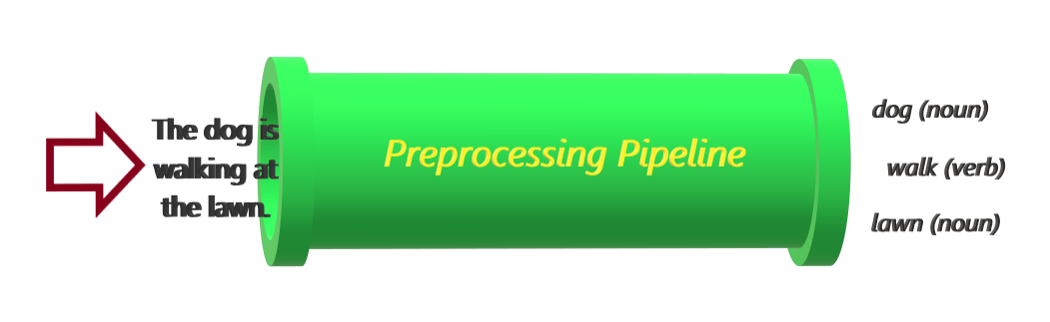

Picture is from [here.](https://medium.com/analytics-vidhya/nlp-preprocessing-pipeline-what-when-why-2fc808899d1f)

## 1 step. Tokenization and data cleaning

The first step is to split the text into units we are going to work with. This units are called **tokens**, and the process itself is called **tokenization.** In most cases we take words as such tokens, but sometimes we want to work with n-gramms or letters. 


On this seminar we will work on word-level. Most easy way to split the text into words (or tokens) is to split it by spaces (correctly handling punctuation). 

## 2 step. Removing stop words

In every language there are a lot of filler words that appear very frequently like “and”, “the”, and “a” in English. When doing statistics on text, these words introduce a lot of noise since they appear way more frequently than other words. Such words are called **stop words** and are commonly ignored in most NLP-algorithm. Thus, on the 2nd step we remove stop-words from the text.





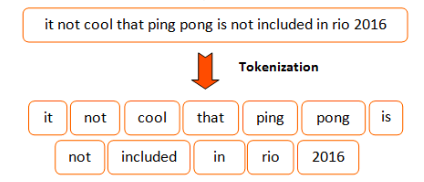

In [ ]:
import string # for work with strings
import nltk   # Natural Language Toolkit

In [ ]:
# get russian stop words
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

# example of stop words
stop_words[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [ ]:
# punctuation characters
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# define word tokenizer
word_tokenizer = nltk.WordPunctTokenizer()

In [ ]:
dates = [str(x) for x in np.arange(1900, 2022)]
def process_data(data):
    texts = []
    targets = []

    for item in data:
        
        # collect nlabels of news
        
        
        text_lower = item['text'].lower() # convert words in a text to lower case
        tokens     = word_tokenizer.tokenize(text_lower) # splits the text into tokens (words)
        
        # remove punct and stop words from tokens
        tokens = [word for word in tokens if (word not in string.punctuation and word not in stop_words and word not in dates)]
        
        texts.append(tokens) # collect the text tokens
    
    return texts

In [ ]:
# run tokenization and data cleaning
y = [item['sentiment'] for item in data]
texts = process_data(data)

In [ ]:
# example
i = 1
print("Label: ", y[i])
print("Tokens: ", texts[i][:5])

Label:  negative
Tokens:  ['медики', 'рассказали', 'состоянии', 'пострадавшего', 'мужчины']


## 3 step. Words normalization

There exist 2 most common ways of words normalizing: **stemming** and **lemmatization**. They are slightly different and in different languages the one or the other is prefferes.

**1) Stemming** 
A Stem is the “core structure” of a plant. All leaves are connected to distinct parts of the Stem. A similar concept can be applied to words. Words are leaves, their “core” are stems (think of a trie data structure if you know what I mean). Stemming is the process of reducing each word (encompassed by a token) to its core elements, reducing temporal, gender (if that’s the language case) and grade variety (considering that this information is appended to the last part of the word). 

**2) Lemmatization** converts a word to its normal form.

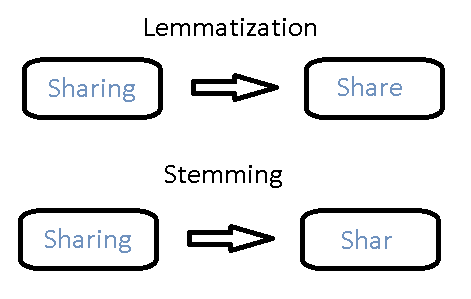

In [ ]:
from nltk.stem.snowball import SnowballStemmer 

# define stemmer
stemmer = SnowballStemmer("russian")

In [ ]:
# example of its work
i = 1
for aword in texts[i][:10]:
    aword_stem = stemmer.stem(aword)
    print("Before: %s, After: %s" % (aword, aword_stem))

Before: медики, After: медик
Before: рассказали, After: рассказа
Before: состоянии, After: состоян
Before: пострадавшего, After: пострада
Before: мужчины, After: мужчин
Before: которого, After: котор
Before: совершено, After: соверш
Before: нападение, After: нападен
Before: возле, After: возл
Before: отделения, After: отделен


In [ ]:
text = 'машинное обучение в высшей школе экономики'
stemmed_text = ' '.join([stemmer.stem(x) for x in text.split(' ')])
print('Original text:\t',text)
print('Stemmed text:\t',stemmed_text)

Original text:	 машинное обучение в высшей школе экономики
Stemmed text:	 машин обучен в высш школ экономик


It could be seen that for the Russian language the result is not that good. The meaning of the sentence becomes umbiguous.

In [ ]:
import pymorphy2 # Морфологический анализатор

# define lemmatizer :)
morph = pymorphy2.MorphAnalyzer()

In [ ]:
# example of its work
i = 1
for aword in texts[i][:10]:
    aword_norm = morph.parse(aword)[0].normal_form
    print("Before: %s, After: %s" % (aword, aword_norm))

Before: медики, After: медик
Before: рассказали, After: рассказать
Before: состоянии, After: состояние
Before: пострадавшего, After: пострадать
Before: мужчины, After: мужчина
Before: которого, After: который
Before: совершено, After: совершить
Before: нападение, After: нападение
Before: возле, After: возле
Before: отделения, After: отделение


In [ ]:
text = 'машинное обучение в высшей школе экономики'
stemmed_text = ' '.join([morph.parse(x)[0].normal_form for x in text.split(' ')])
print('Original text:\t',text)
print('Lemmatized text:\t',stemmed_text)

Original text:	 машинное обучение в высшей школе экономики
Lemmatized text:	 машинный обучение в высокий школа экономика


Much better! The text looks little bit strange but understadable.

**Hint** For complex languages with many word forms, like Russian, it is better to use lemmatization.

## Be careful!
**Pymorphy can be slow. If you do not want to wait, skip the next cell and load already preprocessed texts.**

In [ ]:
# apply stemming to all texts
for i in tqdm_notebook(range(len(texts))):           # tqdm_notebook creates the process bar below :)
    text_lemmatized = [morph.parse(x)[0].normal_form for x in texts[i]] # apply lemmatization to each word in a text
    texts[i] = ' '.join(text_lemmatized)                # unite all stemmed words into a new text

  0%|          | 0/8263 [00:00<?, ?it/s]

In [ ]:
with open('text_lemmatized.txt', 'w', encoding = 'utf-8') as f:
  for text in texts:
    f.write(text+'\n')
texts = open('text_lemmatized.txt', encoding = 'utf-8').readlines()

In [ ]:
# example
i = 1
print("Label: ",   y[i])
print("Text: \n",  texts[i])

Label:  negative
Text: 
 медик рассказать состояние пострадать мужчина который совершить нападение возле отделение банк тимирязев прокомментировать tengrinews kz пресс служба управление здравоохранение алматы место происшествие служба скорый помощь обратиться двое человек « один место оказать медицинский помощь госпитализация отказаться второй пациент доставить больница скорый неотложный помощь бснп сотрясение головной мозг ушибить рана голова состояние данный момент оцениваться близкий удовлетворительный пока проходить обследование больница », — сообщить управление здравоохранение алматы напомнить алматы пересечение улица тимирязев марков возле бц « алатау гранд » произойти стрельба ориентировочно обеденный время здание расположить отделение банк « втб » « сбербанк ». настоящий время полицейский разыскивать подозревать стрельба факт нападение местный управление внутренний дело начать досудебный расследование статья 192 ук рк « разбой ». создать специальный следственно оперативный груп

In [ ]:
# exercise week 1

stop_words_eng = nltk.corpus.stopwords.words('english')
text = 'he is going to visit three museums today'
result = []

text_split = text.split(' ')
print(text_split)

for w in text_split:
  if w not in stop_words_eng:
    result.append(w)

print(result)

result2  =[]

stemmer_eng = SnowballStemmer("english")
for w in result:
  w_stem = stemmer_eng.stem(w)
  result2.append(w_stem)

print(result2)


['he', 'is', 'going', 'to', 'visit', 'three', 'museums', 'today']
['going', 'visit', 'three', 'museums', 'today']
['go', 'visit', 'three', 'museum', 'today']
